# Credit-Line | EDA | Megafon признаки

- [Анализ пропусков](#Анализ-пропусков)
- [Анализ распределений](#Анализ-распределений)
- [Корреляции](#Корреляции)

In [1]:
import sys
sys.path.append('..')
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

import utils
from utils.eda import cat_feature_report
from utils.eda import num_feature_report

In [2]:
DATA_PATH = os.path.join('..', 'data', 'raw', 'raw.csv')

In [3]:
megafon = pd.read_csv(
    DATA_PATH,
    index_col='AppId',
    parse_dates=['dtstart'],
    usecols=[
        'AppId',
        'dtstart',
        
        'StatusCodeResponse',
        'Score',
        'MatchingLevel',
        'ALLCLCValueId',
        'BLOCKCNTValueId',
        'BLOCKDURValueId',
        'INTEGRALSCOREValueId',
        'LIFETIMEBINValueId',
        'PAYMAXValueId',

        '60_6mob',
        '30_2mob',
    ],
)

megafon = megafon.query('dtstart < "2023-08-01"')
megafon['60_6mob'] = megafon['60_6mob'].apply(lambda x: 0 if str(x) == '0.0' else 1)  # Предобработка таргета
megafon['30_2mob'] = megafon['30_2mob'].apply(lambda x: 0 if str(x) == '0.0' else 1)  # Предобработка таргета

In [4]:
megafon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24350 entries, 888776 to 1912560
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dtstart               24350 non-null  datetime64[ns]
 1   StatusCodeResponse    15384 non-null  float64       
 2   Score                 12776 non-null  float64       
 3   MatchingLevel         12776 non-null  float64       
 4   ALLCLCValueId         22164 non-null  float64       
 5   BLOCKCNTValueId       22164 non-null  float64       
 6   BLOCKDURValueId       22164 non-null  float64       
 7   INTEGRALSCOREValueId  22149 non-null  float64       
 8   LIFETIMEBINValueId    22166 non-null  float64       
 9   PAYMAXValueId         22164 non-null  float64       
 10  30_2mob               24350 non-null  int64         
 11  60_6mob               24350 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 2.4 MB


## Анализ пропусков

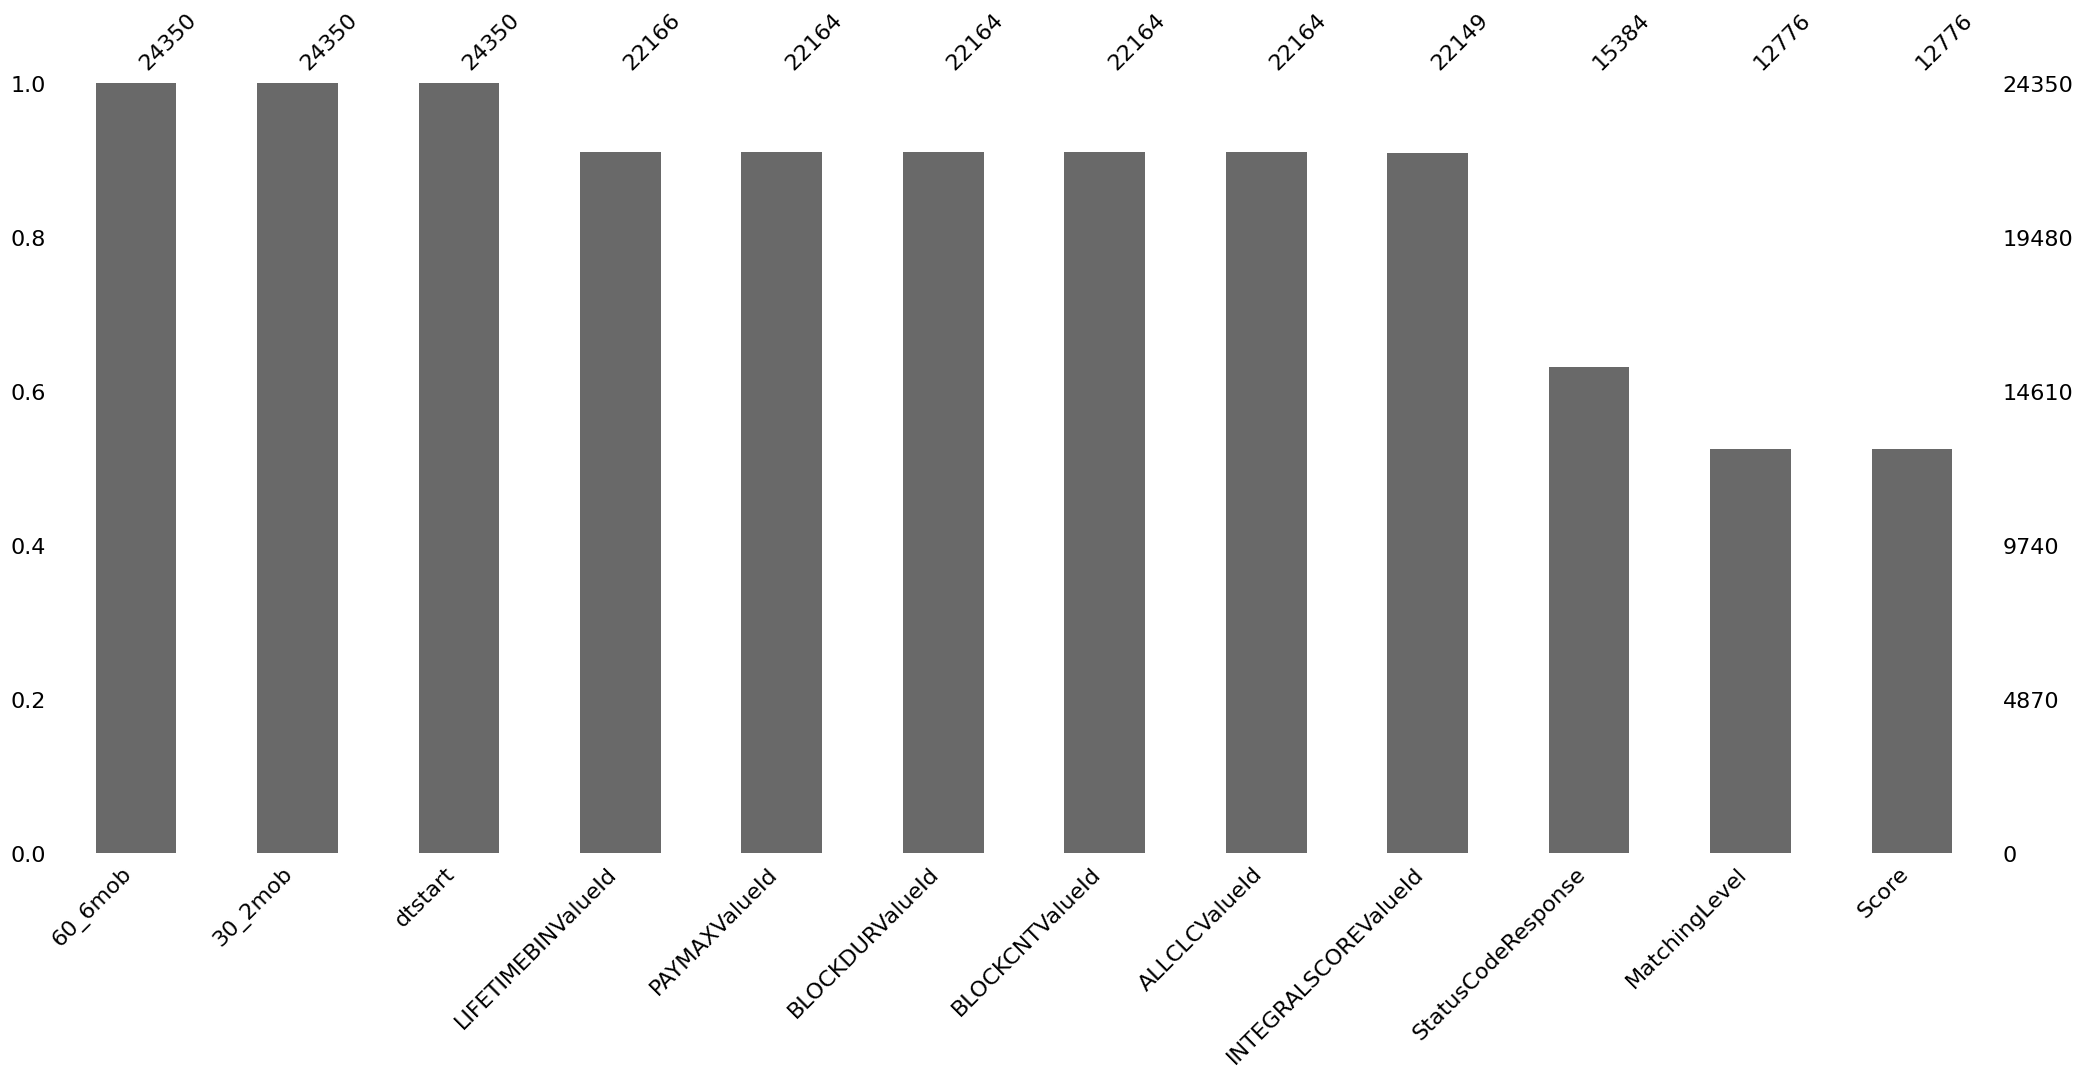

In [5]:
ax = msno.bar(megafon, sort='descending')

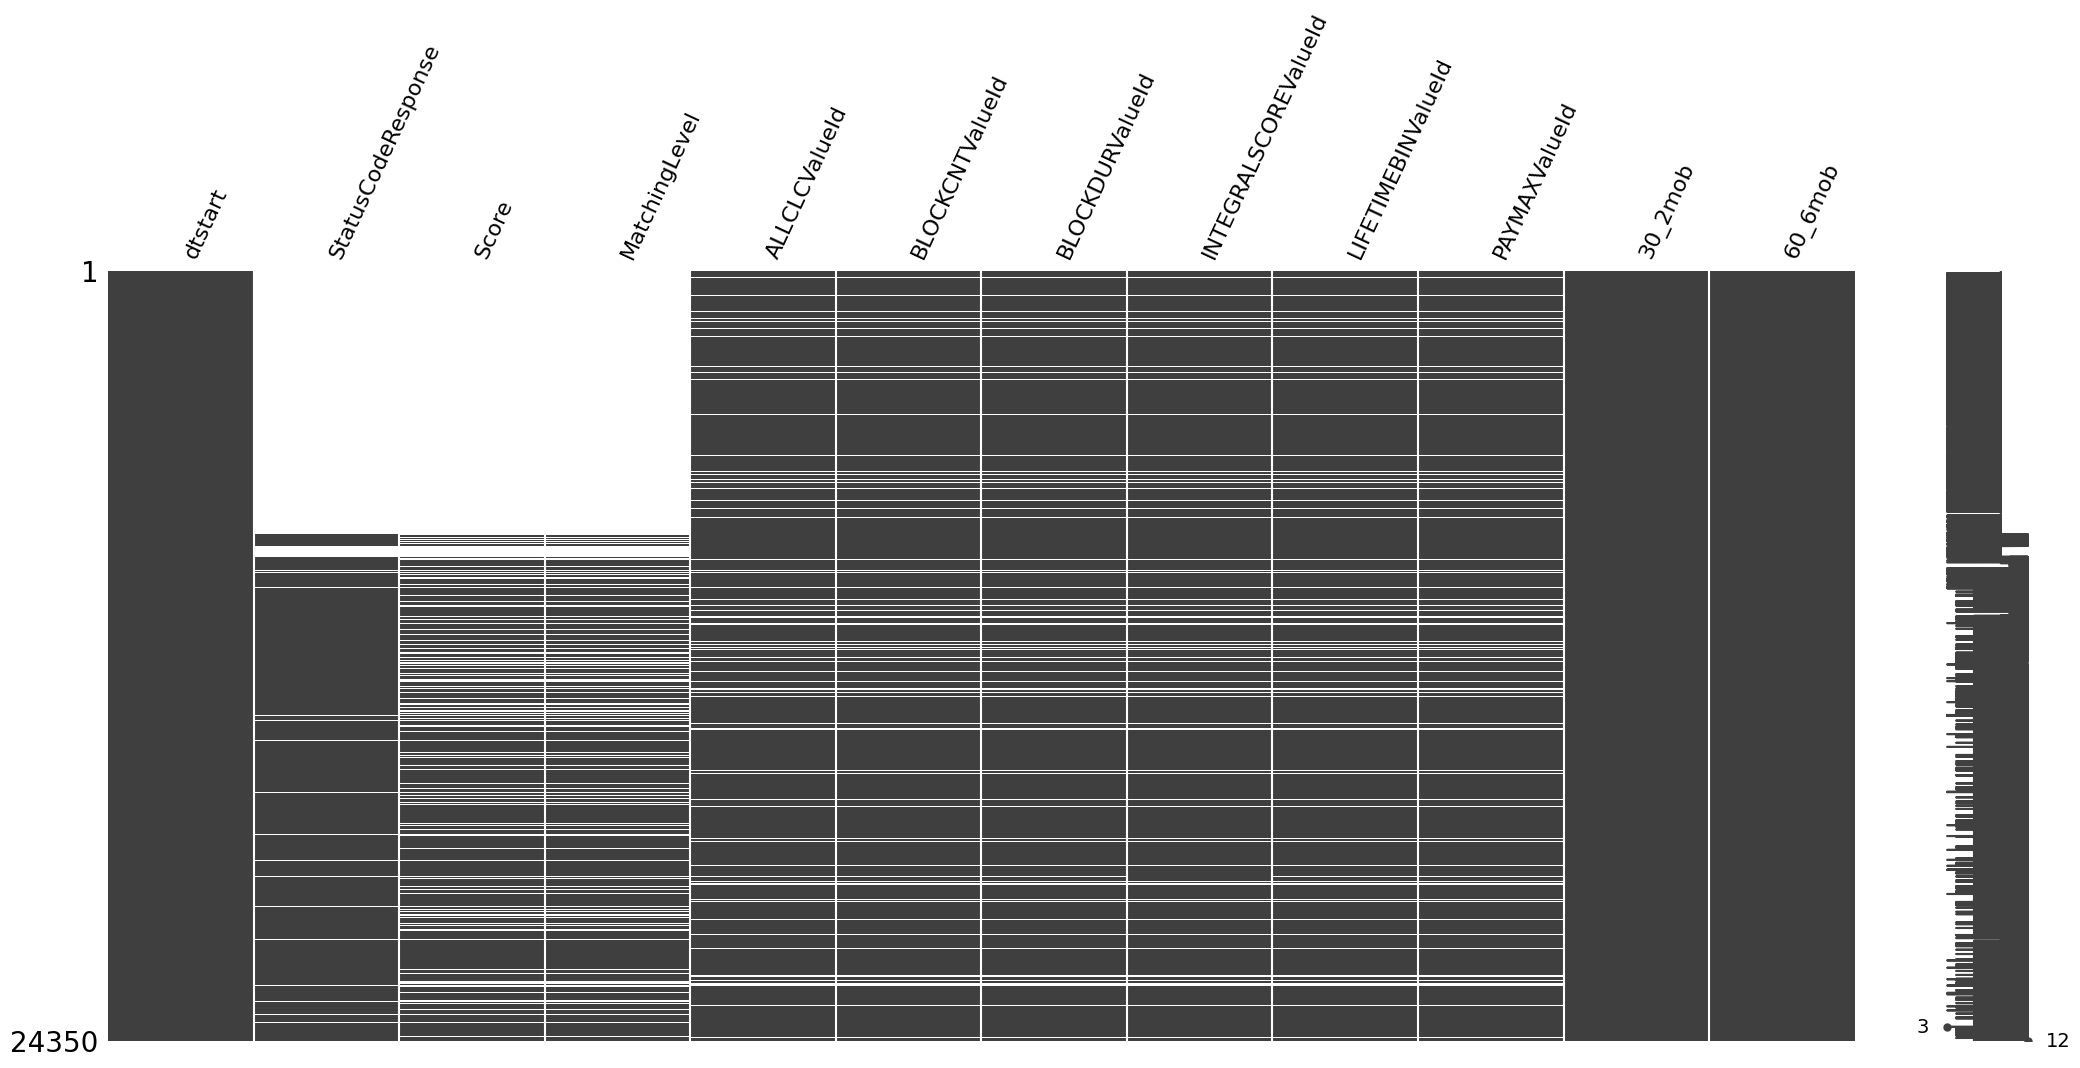

In [6]:
ax = msno.matrix(megafon.sort_values('dtstart'), label_rotation=65)

## Анализ распределений

### `StatusCodeResponse`

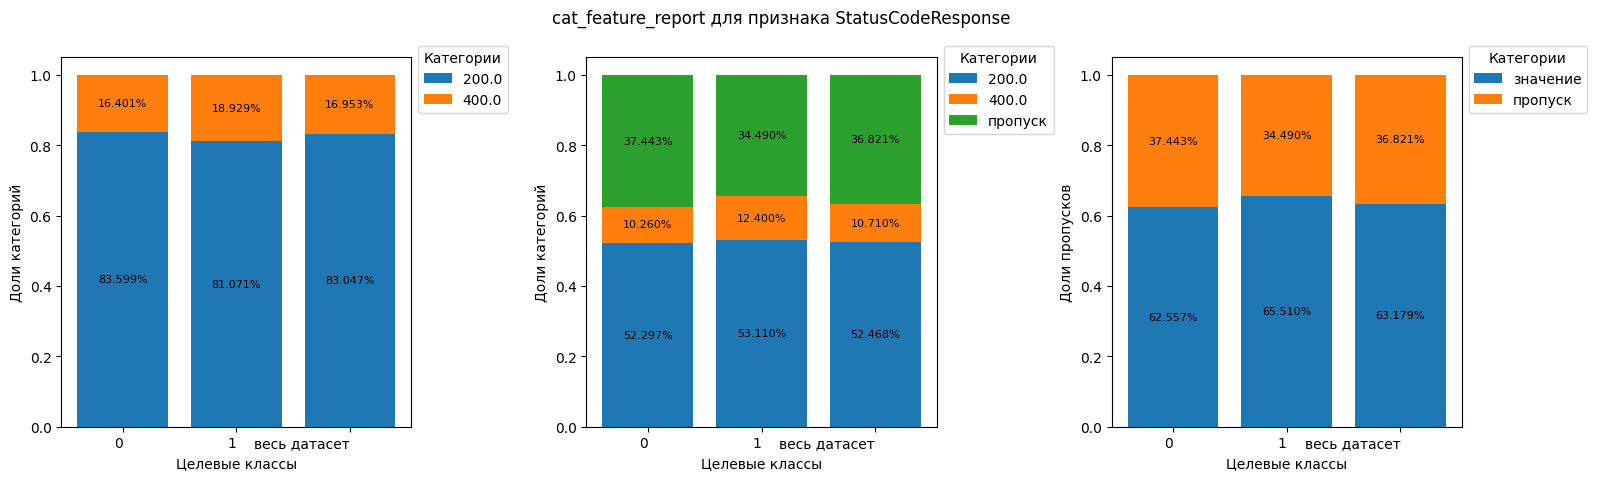

In [14]:
fig, axes = utils.eda.cat_feature_report(megafon, feature_colname='StatusCodeResponse', target_colname='60_6mob')

In [19]:
megafon.drop(columns='StatusCodeResponse', inplace=True)

### `Score`

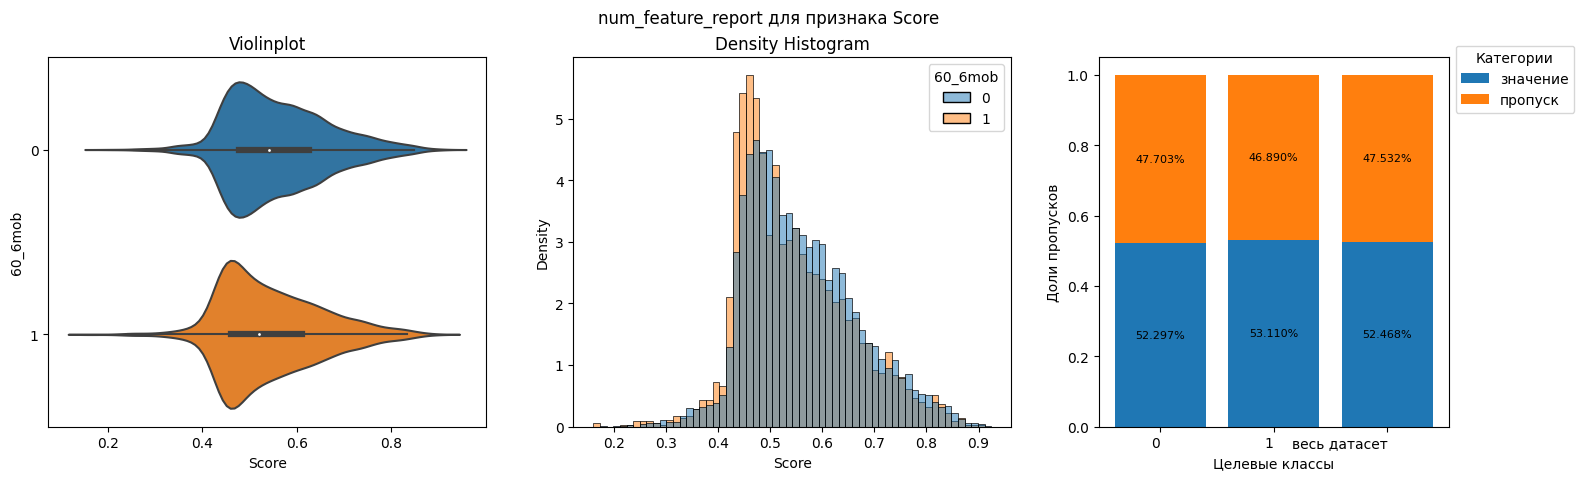

In [16]:
fig, axes = num_feature_report(
    megafon,
    feature_colname='Score',
    target_colname='60_6mob',
    # histplot_args={'discrete': True},
)

### `MatchingLevel`

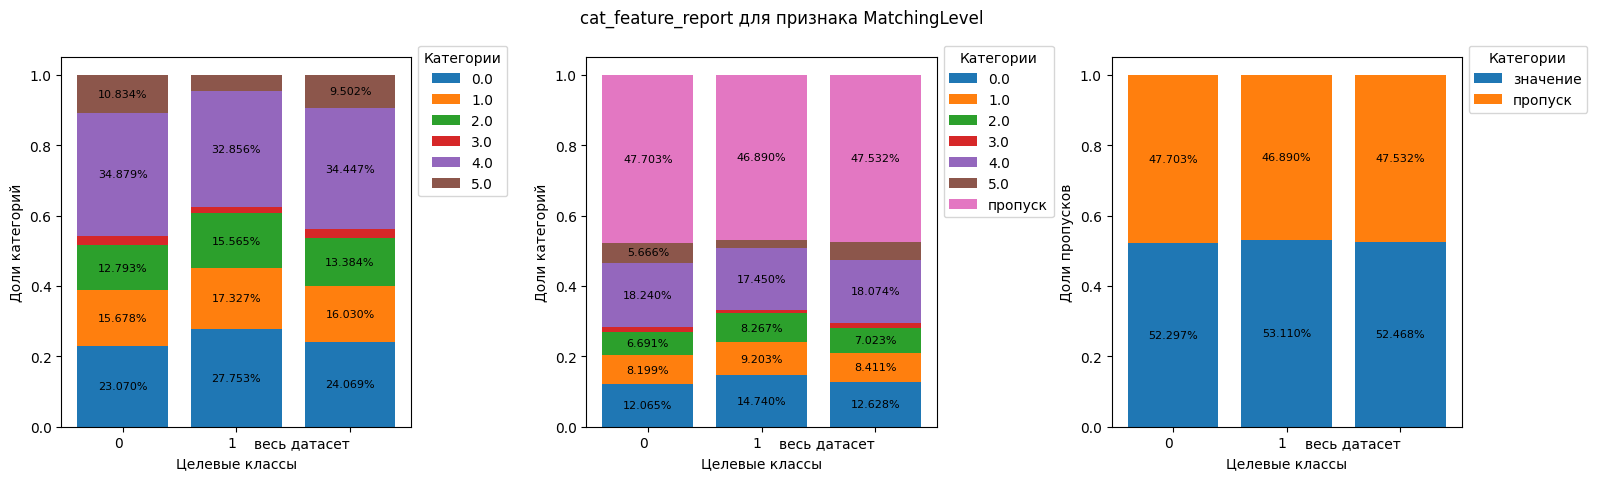

In [17]:
fig, axes = utils.eda.cat_feature_report(megafon, feature_colname='MatchingLevel', target_colname='60_6mob')

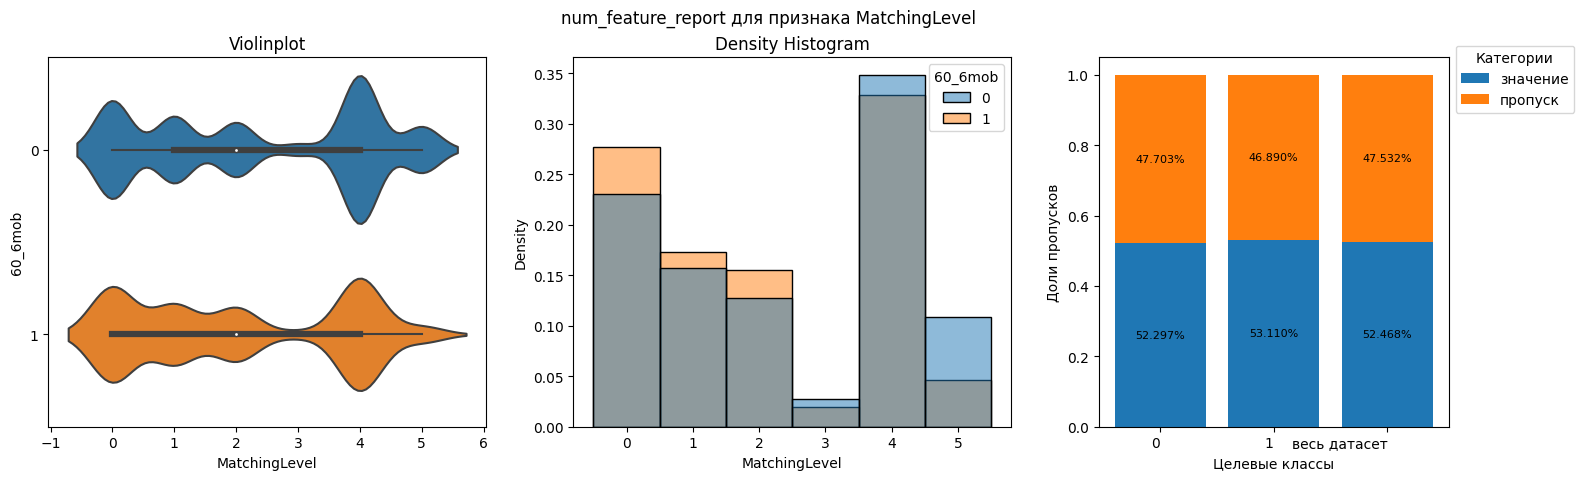

In [21]:
fig, axes = num_feature_report(
    megafon,
    feature_colname='MatchingLevel',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `ALLCLCValueId` - оценка предполагаемой платежеспособности клиента на основе анализа данных по затратам на услуги связи	

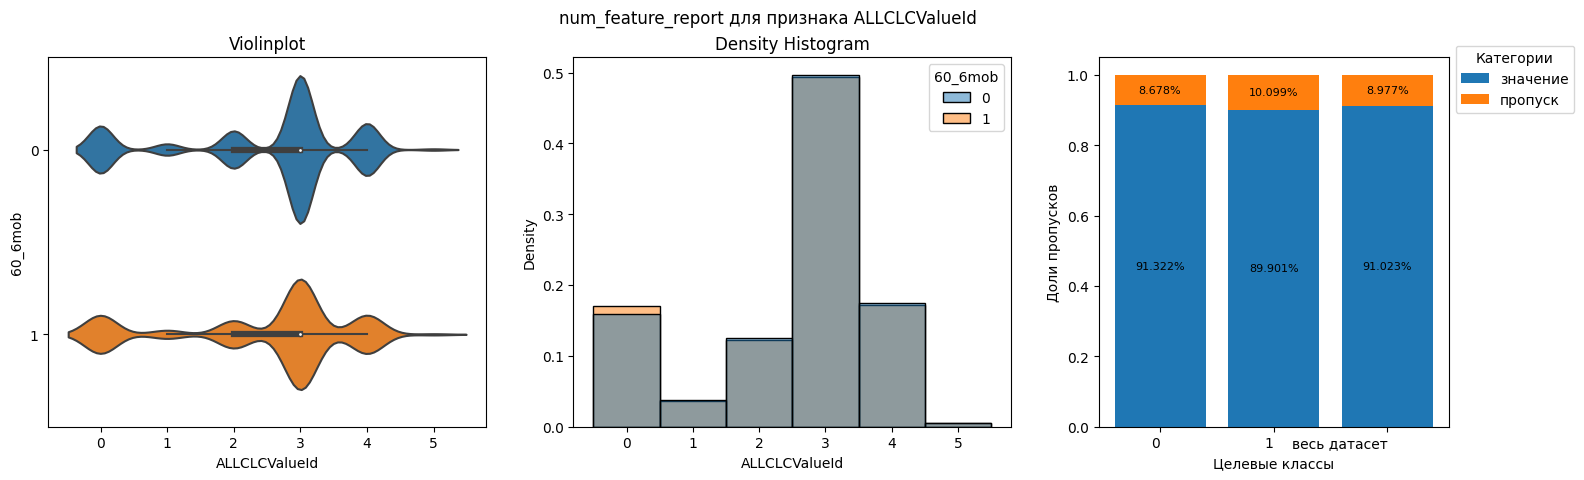

In [8]:
fig, axes = num_feature_report(
    megafon,
    feature_colname='ALLCLCValueId',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `BLOCKCNTValueId` - оценка предполагаемой платежеспособности клиента на основе анализа данных по длительности использования телефонного номера	

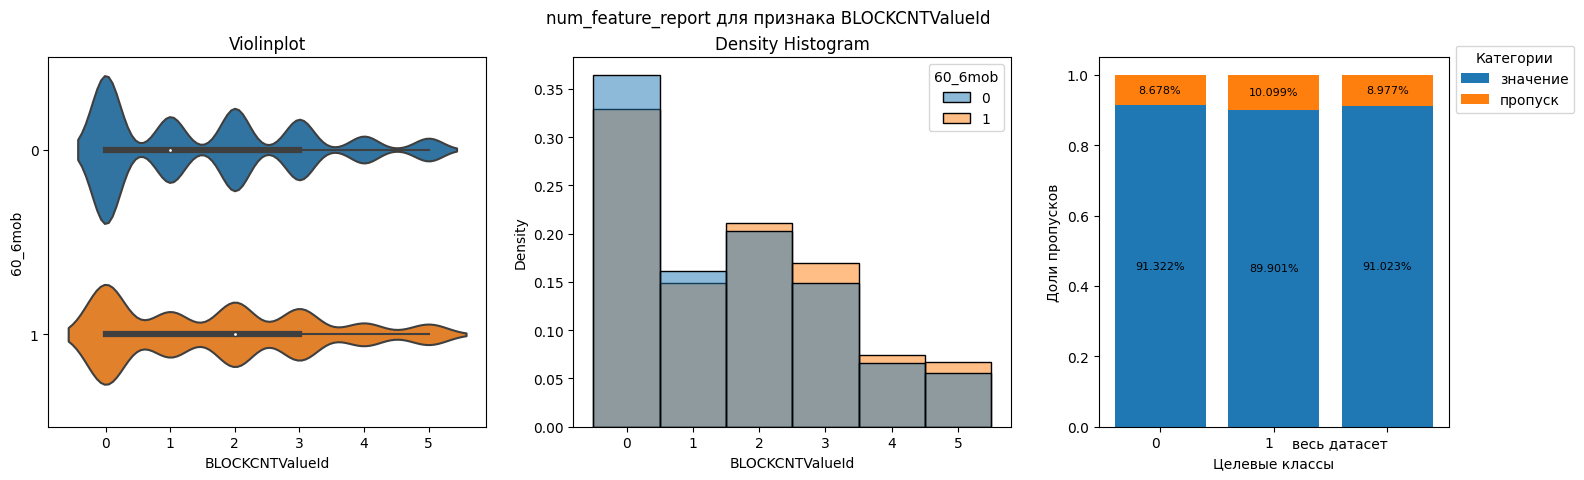

In [9]:
fig, axes = num_feature_report(
    megafon,
    feature_colname='BLOCKCNTValueId',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `BLOCKDURValueId` - оценка предполагаемой платежеспособности клиента на основе анализа данных по регулярности использования телефонного номера	

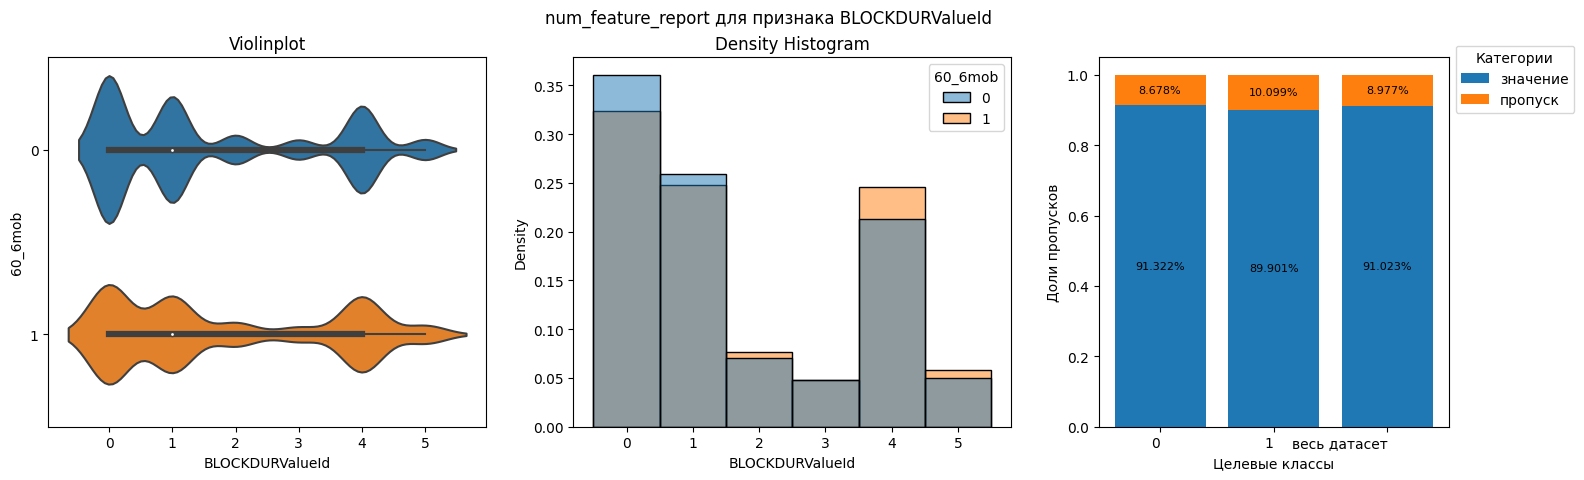

In [10]:
fig, axes = num_feature_report(
    megafon,
    feature_colname='BLOCKDURValueId',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `INTEGRALSCOREValueId` - общий рекомендательный балл	

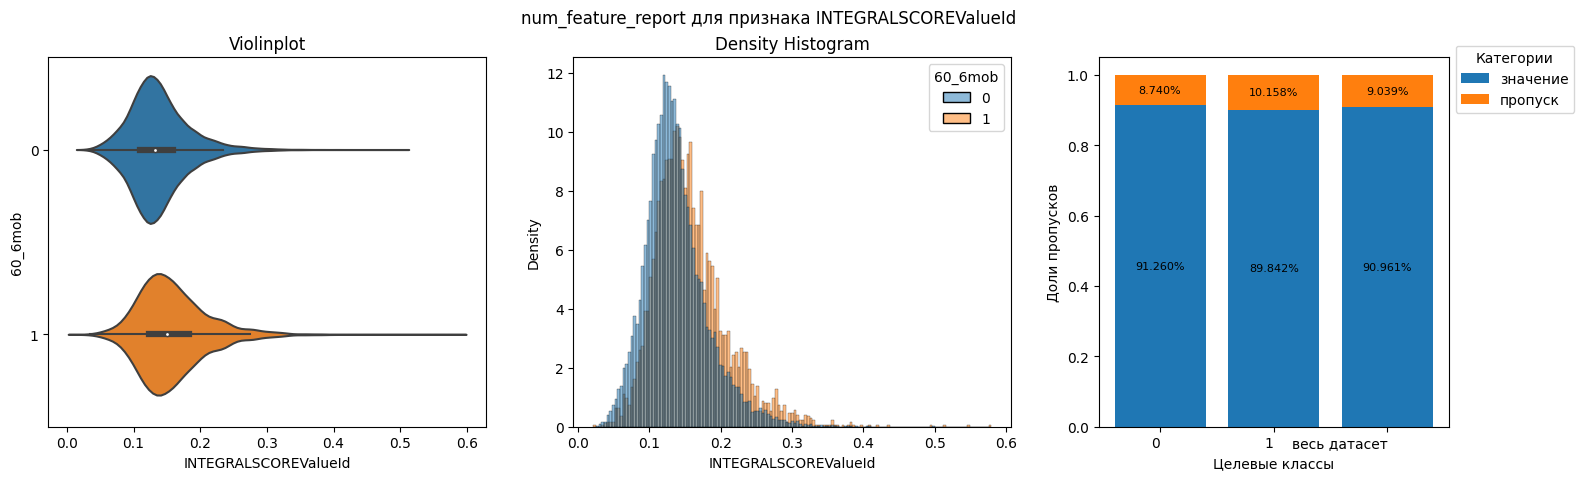

In [11]:
fig, axes = num_feature_report(megafon, feature_colname='INTEGRALSCOREValueId', target_colname='60_6mob')

### `LIFETIMEBINValueId` - оценка предполагаемой платежеспособности клиента на основе анализа данных по сроку использования номера телефона	

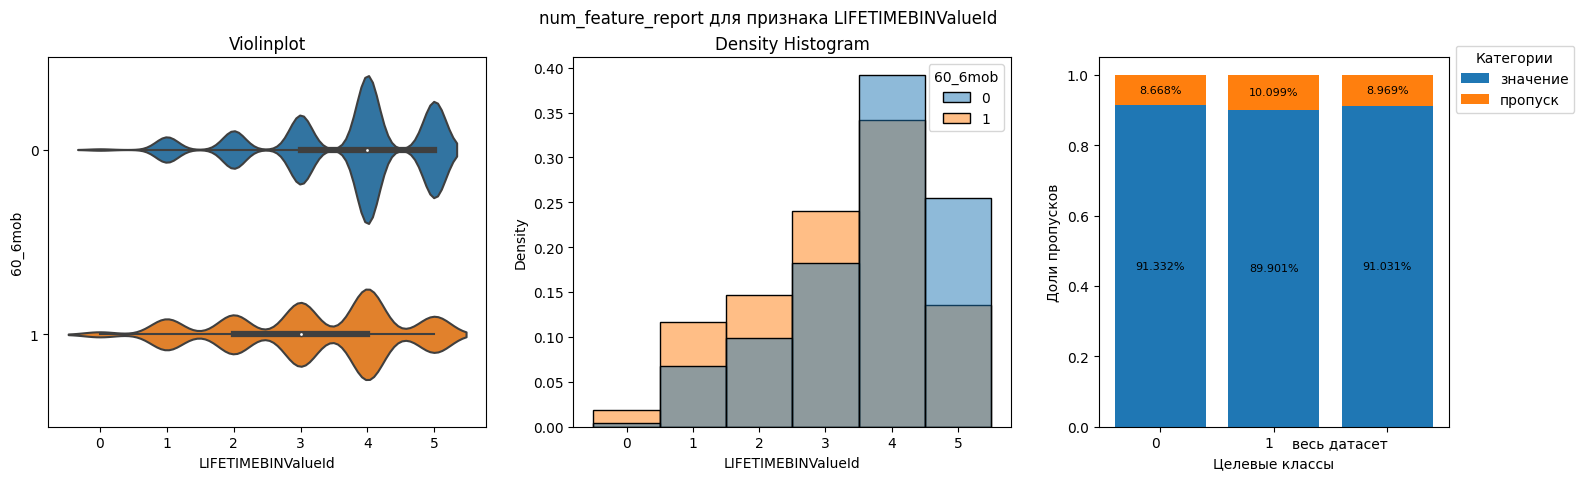

In [12]:
fig, axes = num_feature_report(
    megafon,
    feature_colname='LIFETIMEBINValueId',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### `PAYMAXValueId` - оценка предполагаемой платежеспособности клиента на основе анализа данных по платежам за услуги связи	

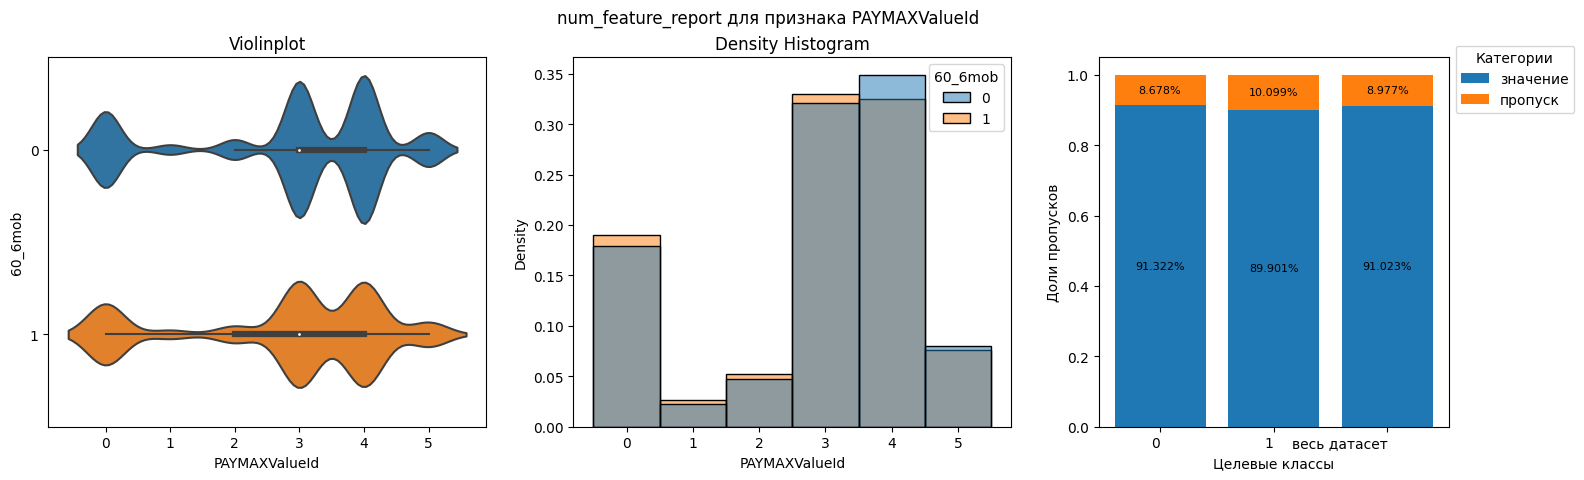

In [13]:
fig, axes = num_feature_report(
    megafon,
    feature_colname='PAYMAXValueId',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
)

### Корреляция

In [22]:
megafon_corr = megafon.drop(columns='dtstart')
megafon_corr = megafon_corr.astype('float')

### Pearson

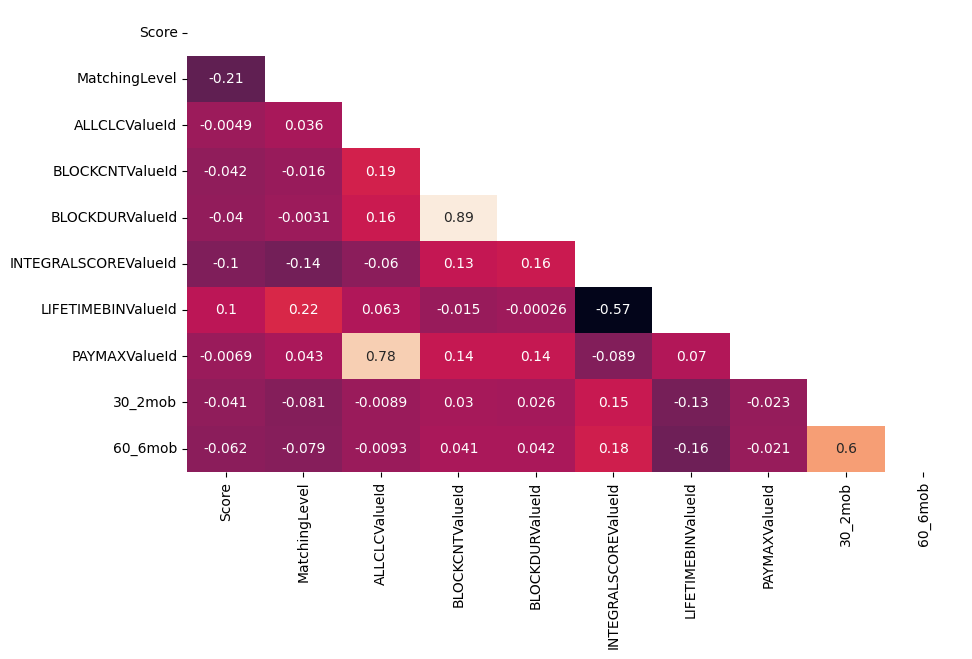

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    megafon_corr.corr(method='pearson'),
    mask=np.triu(np.ones_like(megafon_corr.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

### Spearman

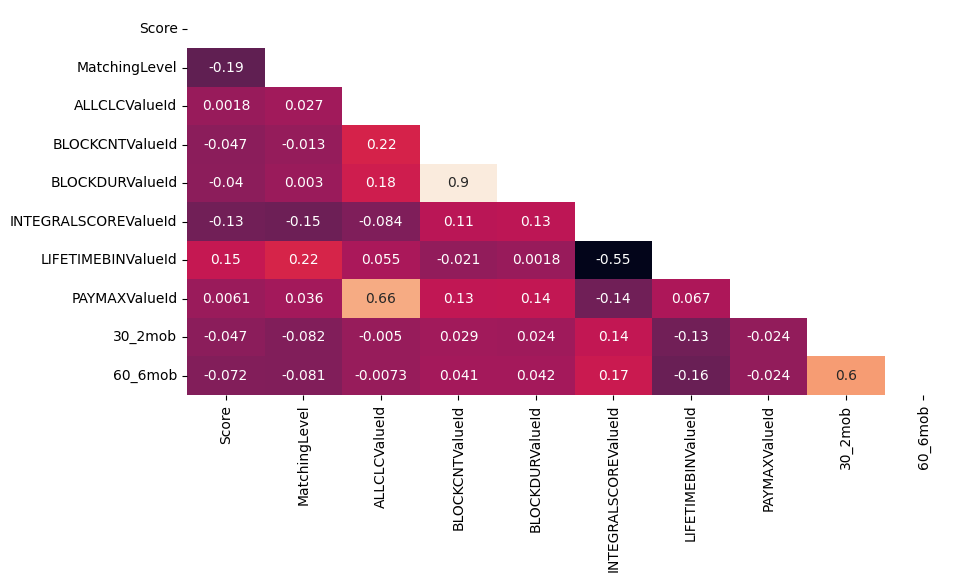

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(
    megafon_corr.corr(method='spearman'),
    mask=np.triu(np.ones_like(megafon_corr.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()